In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm
from fbprophet import Prophet
import matplotlib.dates as mtd
from matplotlib.ticker import ScalarFormatter
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm
import matplotlib.dates as mtd
from matplotlib.ticker import ScalarFormatter
import warnings
warnings.filterwarnings("ignore")

### Reading the datasets

In [2]:
cd = pd.read_excel('D:/college/PG/3RD SEM/MINI PROJECT/Covid19.xlsx',na_values=['?'])
vd = pd.read_csv('D:/college/PG/3RD SEM/MINI PROJECT/vaccine.csv',na_values=['?'])

In [3]:
cd.shape

(15554, 12)

In [4]:
vd.shape

(5144, 18)

### Pre-processing of data

In [5]:
cd.head()

,Sno,Date,Time,State/UnionTerritory,18-45 years (Age),45-60 years (Age),60+ years (Age),ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,18:00:00,Kerala,0,0,0,1,0,0,0,1
1,2,2020-01-31,18:00:00,Kerala,0,0,0,1,0,0,0,1
2,3,2020-02-01,18:00:00,Kerala,0,0,0,2,0,0,0,2
3,4,2020-02-02,18:00:00,Kerala,0,0,0,3,0,0,0,3
4,5,2020-02-03,18:00:00,Kerala,0,0,0,3,0,0,0,3


In [6]:
cd.describe().T

,count,mean,std,min,25%,50%,75%,max
Sno,15554.0,7777.500000,4.490197e+03,1.0,3889.25,7777.5,11665.75,15554.0
18-45 years (Age),15554.0,424175.019995,1.312064e+06,0.0,5745.50,155982.0,289095.75,36494965.0
45-60 years (Age),15554.0,756396.684133,3.592004e+06,0.0,226.00,167961.0,607733.00,72388059.0
60+ years (Age),15554.0,534375.626527,3.307797e+06,0.0,0.00,35003.5,288615.25,59461062.0
ConfirmedIndianNational,15554.0,0.349492,4.179123e+00,0.0,0.00,0.0,0.00,177.0
ConfirmedForeignNational,15554.0,0.042883,6.543995e-01,0.0,0.00,0.0,0.00,14.0
Cured,15554.0,189818.374502,4.061648e+05,0.0,1950.25,21415.5,215148.25,5395370.0
Deaths,15554.0,2898.898804,7.637202e+03,0.0,14.00,374.0,2527.00,95344.0
Confirmed,15554.0,211083.525010,4.542665e+05,0.0,3177.00,28749.0,238783.00,5746892.0


In [7]:
cd.isnull()

,Sno,Date,Time,State/UnionTerritory,18-45 years (Age),45-60 years (Age),60+ years (Age),ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
15549,False,False,False,False,False,False,False,False,False,False,False,False
15550,False,False,False,False,False,False,False,False,False,False,False,False
15551,False,False,False,False,False,False,False,False,False,False,False,False
15552,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
cd.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
18-45 years (Age)           0
45-60 years (Age)           0
60+ years (Age)             0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [9]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15554 entries, 0 to 15553
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       15554 non-null  int64         
 1   Date                      15554 non-null  datetime64[ns]
 2   Time                      15554 non-null  object        
 3   State/UnionTerritory      15554 non-null  object        
 4   18-45 years (Age)         15554 non-null  int64         
 5   45-60 years (Age)         15554 non-null  int64         
 6   60+ years (Age)           15554 non-null  int64         
 7   ConfirmedIndianNational   15554 non-null  int64         
 8   ConfirmedForeignNational  15554 non-null  int64         
 9   Cured                     15554 non-null  int64         
 10  Deaths                    15554 non-null  int64         
 11  Confirmed                 15554 non-null  int64         
dtypes: datetime64[ns](

In [10]:
cd.nunique().T

Sno                         15554
Date                          489
Time                            7
State/UnionTerritory           40
18-45 years (Age)            3804
45-60 years (Age)            3792
60+ years (Age)              2950
ConfirmedIndianNational        61
ConfirmedForeignNational       11
Cured                       11966
Deaths                       5287
Confirmed                   12522
dtype: int64

In [11]:
cd.describe(include=['object'])

,Time,State/UnionTerritory
count,15554,15554
unique,7,40
top,08:00:00,Kerala
freq,13916,489


In [12]:
cd.describe(include='all')

,Sno,Date,Time,State/UnionTerritory,18-45 years (Age),45-60 years (Age),60+ years (Age),ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
count,15554.000000,15554,15554,15554,1.555400e+04,1.555400e+04,1.555400e+04,15554.000000,15554.000000,1.555400e+04,15554.000000,1.555400e+04
unique,NaN,489,7,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2020-06-11 00:00:00,08:00:00,Kerala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,37,13916,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2020-01-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7777.500000,NaN,NaN,NaN,4.241750e+05,7.563967e+05,5.343756e+05,0.349492,0.042883,1.898184e+05,2898.898804,2.110835e+05
std,4490.197379,NaN,NaN,NaN,1.312064e+06,3.592004e+06,3.307797e+06,4.179123,0.654400,4.061648e+05,7637.201754,4.542665e+05
min,1.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3889.250000,NaN,NaN,NaN,5.745500e+03,2.260000e+02,0.000000e+00,0.000000,0.000000,1.950250e+03,14.000000,3.177000e+03


In [13]:
cd.tail()

,Sno,Date,Time,State/UnionTerritory,18-45 years (Age),45-60 years (Age),60+ years (Age),ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
15549,15550,2021-06-01,08:00:00,Telangana,166058,502704,426706,0,0,540986,3281,578351
15550,15551,2021-06-01,08:00:00,Tripura,166216,524640,437731,0,0,44908,519,51974
15551,15552,2021-06-01,08:00:00,Uttarakhand,166743,564286,459298,0,0,294671,6452,329494
15552,15553,2021-06-01,08:00:00,Uttar Pradesh,166998,581627,468906,0,0,1633947,20497,1691488
15553,15554,2021-06-01,08:00:00,West Bengal,167205,600111,478389,0,0,1273788,15541,1376377


In [14]:
vd.head()

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16-01-21,India,48276,3455,2957,48276,0,23757,24517,2,579,47697,0,0,0,0,0,48276
1,17-01-21,India,58604,8532,4954,58604,0,27348,31252,4,635,57969,0,0,0,0,0,58604
2,18-01-21,India,99449,13611,6583,99449,0,41361,58083,5,1299,98150,0,0,0,0,0,99449
3,19-01-21,India,195525,17855,7951,195525,0,81901,113613,11,3017,192508,0,0,0,0,0,195525
4,20-01-21,India,251280,25472,10504,251280,0,98111,153145,24,3946,247334,0,0,0,0,0,251280


In [15]:
vd.describe()

,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
count,5.144000e+03,5.144000e+03,5144.000000,5.144000e+03,5.144000e+03,5.144000e+03,5.144000e+03,5144.000000,5.144000e+03,5.144000e+03,5144.000000,5144.000000,5.144000e+03,5.144000e+03,5.144000e+03,5.144000e+03
mean,3.322089e+06,2.539833e+05,2328.405327,3.308199e+06,7.171770e+05,1.745221e+06,1.576430e+06,437.983865,3.881631e+05,3.620480e+06,13.560264,558.031299,4.562180e+05,1.354689e+06,1.316371e+06,4.025376e+06
std,1.379183e+07,1.017952e+06,7554.042314,1.378485e+07,3.285369e+06,7.263498e+06,6.528613e+06,1891.584188,1.703273e+06,1.530464e+07,307.149083,2320.618653,2.093782e+06,6.138497e+06,5.666606e+06,1.699737e+07
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.613825e+04,2.131750e+03,62.000000,4.514575e+04,5.980000e+02,2.334000e+04,2.160600e+04,2.000000,0.000000e+00,4.730100e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.820300e+04
50%,2.736705e+05,1.295000e+04,531.000000,2.681980e+05,4.688350e+04,1.350065e+05,1.343025e+05,26.000000,4.340000e+02,2.942025e+05,0.000000,15.000000,1.477400e+04,2.358150e+04,1.791800e+04,3.134380e+05
75%,2.340091e+06,1.702140e+05,1786.500000,2.319106e+06,4.333772e+05,1.259283e+06,1.073500e+06,297.000000,2.198132e+05,2.510345e+06,0.000000,317.000000,3.019345e+05,8.767040e+05,8.236810e+05,2.789293e+06
max,1.683935e+08,1.134066e+07,73933.000000,1.683935e+08,4.338497e+07,9.009561e+07,7.827158e+07,26337.000000,2.344288e+07,1.883247e+08,10898.000000,21260.000000,3.649496e+07,7.238806e+07,5.946106e+07,2.117785e+08


In [16]:
vd.isnull()

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5140,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5141,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5142,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
vd.isnull().sum()

Updated On                             0
State                                  0
Total Individuals Vaccinated           0
Total Sessions Conducted               0
Total Sites                            0
First Dose Administered                0
Second Dose Administered               0
Male(Individuals Vaccinated)           0
Female(Individuals Vaccinated)         0
Transgender(Individuals Vaccinated)    0
Total Covaxin Administered             0
Total CoviShield Administered          0
Total Sputnik V Administered           0
AEFI                                   0
18-45 years (Age)                      0
45-60 years (Age)                      0
60+ years (Age)                        0
Total Doses Administered               0
dtype: int64

In [18]:
vd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Updated On                           5144 non-null   object
 1   State                                5144 non-null   object
 2   Total Individuals Vaccinated         5144 non-null   int64 
 3   Total Sessions Conducted             5144 non-null   int64 
 4   Total Sites                          5144 non-null   int64 
 5   First Dose Administered              5144 non-null   int64 
 6   Second Dose Administered             5144 non-null   int64 
 7   Male(Individuals Vaccinated)         5144 non-null   int64 
 8   Female(Individuals Vaccinated)       5144 non-null   int64 
 9   Transgender(Individuals Vaccinated)  5144 non-null   int64 
 10  Total Covaxin Administered           5144 non-null   int64 
 11  Total CoviShield Administered        5144 n

In [19]:
vd.describe(include=['object'])

,Updated On,State
count,5144,5144
unique,140,37
top,30-04-21,Chandigarh
freq,37,140


In [20]:
vd.describe(include='all')

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
count,5144,5144,5.144000e+03,5.144000e+03,5144.000000,5.144000e+03,5.144000e+03,5.144000e+03,5.144000e+03,5144.000000,5.144000e+03,5.144000e+03,5144.000000,5144.000000,5.144000e+03,5.144000e+03,5.144000e+03,5.144000e+03
unique,140,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,30-04-21,Chandigarh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,37,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.322089e+06,2.539833e+05,2328.405327,3.308199e+06,7.171770e+05,1.745221e+06,1.576430e+06,437.983865,3.881631e+05,3.620480e+06,13.560264,558.031299,4.562180e+05,1.354689e+06,1.316371e+06,4.025376e+06
std,NaN,NaN,1.379183e+07,1.017952e+06,7554.042314,1.378485e+07,3.285369e+06,7.263498e+06,6.528613e+06,1891.584188,1.703273e+06,1.530464e+07,307.149083,2320.618653,2.093782e+06,6.138497e+06,5.666606e+06,1.699737e+07
min,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,4.613825e+04,2.131750e+03,62.000000,4.514575e+04,5.980000e+02,2.334000e+04,2.160600e+04,2.000000,0.000000e+00,4.730100e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.820300e+04
50%,NaN,NaN,2.736705e+05,1.295000e+04,531.000000,2.681980e+05,4.688350e+04,1.350065e+05,1.343025e+05,26.000000,4.340000e+02,2.942025e+05,0.000000,15.000000,1.477400e+04,2.358150e+04,1.791800e+04,3.134380e+05
75%,NaN,NaN,2.340091e+06,1.702140e+05,1786.500000,2.319106e+06,4.333772e+05,1.259283e+06,1.073500e+06,297.000000,2.198132e+05,2.510345e+06,0.000000,317.000000,3.019345e+05,8.767040e+05,8.236810e+05,2.789293e+06


In [21]:
vd.fillna(0)

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16-01-21,India,48276,3455,2957,48276,0,23757,24517,2,579,47697,0,0,0,0,0,48276
1,17-01-21,India,58604,8532,4954,58604,0,27348,31252,4,635,57969,0,0,0,0,0,58604
2,18-01-21,India,99449,13611,6583,99449,0,41361,58083,5,1299,98150,0,0,0,0,0,99449
3,19-01-21,India,195525,17855,7951,195525,0,81901,113613,11,3017,192508,0,0,0,0,0,195525
4,20-01-21,India,251280,25472,10504,251280,0,98111,153145,24,3946,247334,0,0,0,0,0,251280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,30-05-21,West Bengal,10547015,381157,1170,10547015,3865954,5871662,4674095,1258,1625834,12787135,0,1100,2202804,4404252,3938023,14412969
5140,31-05-21,West Bengal,10838457,839415,2511,10838457,3879678,6050228,4786796,1433,1650999,13067136,0,1144,2402085,4469534,3964698,14718135
5141,01-06-21,West Bengal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5142,02-06-21,West Bengal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
vd.tail()

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
5139,30-05-21,West Bengal,10547015,381157,1170,10547015,3865954,5871662,4674095,1258,1625834,12787135,0,1100,2202804,4404252,3938023,14412969
5140,31-05-21,West Bengal,10838457,839415,2511,10838457,3879678,6050228,4786796,1433,1650999,13067136,0,1144,2402085,4469534,3964698,14718135
5141,01-06-21,West Bengal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5142,02-06-21,West Bengal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5143,03-06-21,West Bengal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
cd[cd['State/UnionTerritory']=='Tamil Nadu'].head()

,Sno,Date,Time,State/UnionTerritory,18-45 years (Age),45-60 years (Age),60+ years (Age),ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
61,62,2020-03-07,18:00:00,Tamil Nadu,8219288,10165734,15826268,1,0,0,0,1
67,68,2020-03-08,18:00:00,Tamil Nadu,8895838,13438961,24101658,1,0,0,0,1
79,80,2020-03-09,18:00:00,Tamil Nadu,9994341,27028827,34992622,1,0,0,0,1
94,95,2020-03-10,18:00:00,Tamil Nadu,10889235,52371179,48391750,1,0,0,0,1
105,106,2020-03-11,18:00:00,Tamil Nadu,15057167,58438144,53191783,1,0,0,0,1


In [24]:
cd[((cd['Date']=='2021-04-04')&(cd['State/UnionTerritory']=='Tamil Nadu'))]

,Sno,Date,Time,State/UnionTerritory,18-45 years (Age),45-60 years (Age),60+ years (Age),ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
13460,13461,2021-04-04,08:00:00,Tamil Nadu,146349,164798,156433,0,0,863258,12764,896226


In [25]:
print("Minimum date :", min(cd['Date']))
print("Maximum date :", max(cd['Date']))

Minimum date : 2020-01-30 00:00:00
Maximum date : 2021-06-01 00:00:00


In [26]:
#lets convert the Date feature to Date&time datatype
cd['Date']=pd.to_datetime(cd['Date'],format='%Y-%m-%d')

#Time is not required as it doesnt make much difference
cd.drop(['Time'],axis=1, inplace=True)

#Renaming State/UnionTerritory to States for easy reference
cd.rename(columns={'State/UnionTerritory':'States'}, inplace=True)

In [27]:
cd['Active_cases']=cd['Confirmed']-(cd['Cured']+cd['Deaths'])

In [28]:
cd[cd['States']=='Tamil Nadu'].tail()

,Sno,Date,States,18-45 years (Age),45-60 years (Age),60+ years (Age),ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases
15404,15405,2021-05-28,Tamil Nadu,18862,317,22059,0,0,1643284,22289,1978621,313048
15440,15441,2021-05-29,Tamil Nadu,3210,2,3251,0,0,1674539,22775,2009700,312386
15476,15477,2021-05-30,Tamil Nadu,167670,625171,492429,0,0,1706298,23261,2039716,310157
15512,15513,2021-05-31,Tamil Nadu,167205,600111,478389,0,0,1739280,23754,2068580,305546
15548,15549,2021-06-01,Tamil Nadu,165779,474769,412903,0,0,1770503,24232,2096516,301781


### EDA

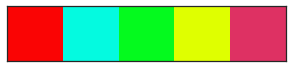

In [29]:
colors=['#FA0404','#04FAE0','#04FA1E','#DFFF00','#DE3163']
sns.set(palette=colors, style='white')

sns.palplot(colors)

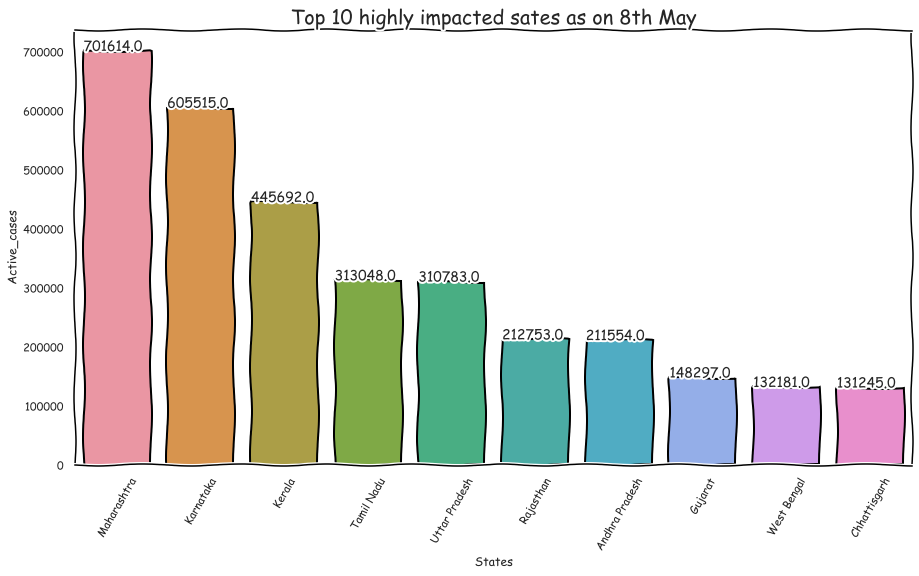

In [30]:
top_10=cd.groupby(by='States').max()[['Active_cases','Date']].sort_values(by=['Active_cases'],ascending=False).reset_index()
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    plt.title("Top 10 highly impacted sates as on 8th May", size=20)
    ax=sns.barplot(data=top_10.iloc[:10],y='Active_cases',x='States', linewidth=2, edgecolor='black')
    ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=60)
    for i in ax.patches:
        ax.text(x=i.get_x(),y=i.get_height(),s=i.get_height())

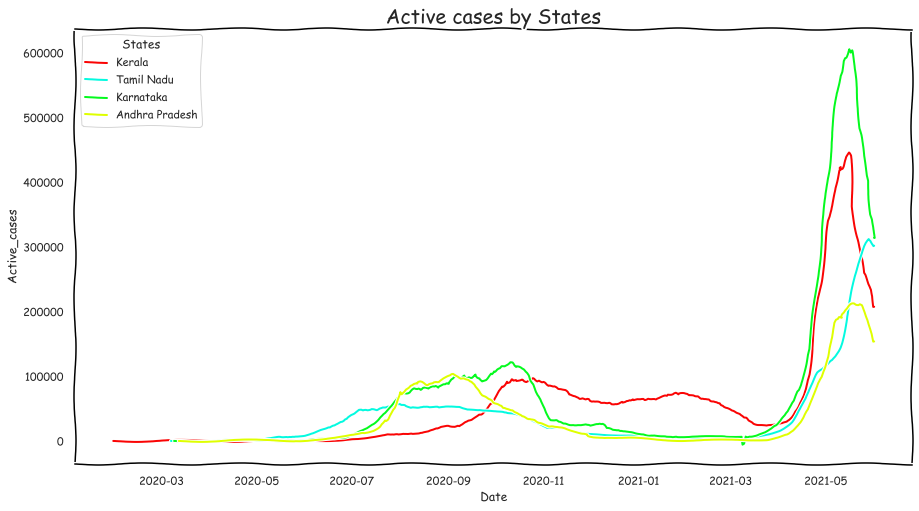

In [31]:
fig=plt.figure(figsize=(15,8))
with plt.xkcd():
    ax=sns.lineplot(data=cd[cd['States'].isin(['Kerala','Tamil Nadu','Karnataka','Andhra Pradesh'])],x='Date',y='Active_cases',hue='States')
    ax.set_title("Active cases by States", size=20)

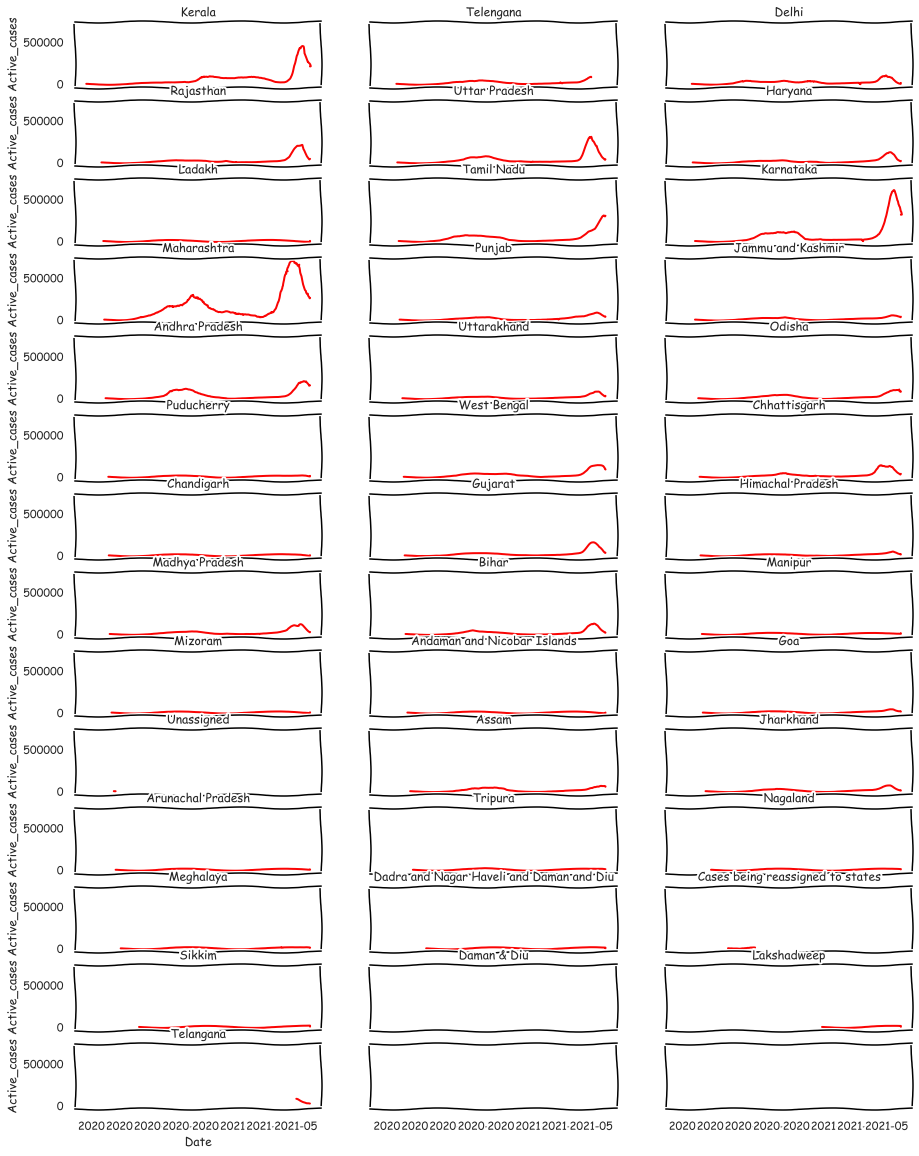

In [32]:
with plt.xkcd():
    fig, ax=plt.subplots(nrows=14, ncols=3, figsize=[15,20], sharex=True, sharey=True)
    ax=ax.flatten()

    for i,s in enumerate(cd['States'].unique()):
        data1=cd[cd['States']==s][['Date','Active_cases']]
        sns.lineplot(data=data1, x='Date',y='Active_cases', ax=ax[i])
        ax[i].set_title(s)

In [33]:
corr = cd.corr()

<AxesSubplot:>

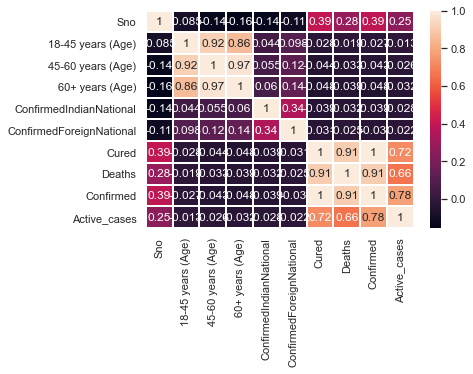

In [34]:
sns.heatmap(corr,linewidth=1,annot = True)

<AxesSubplot:>

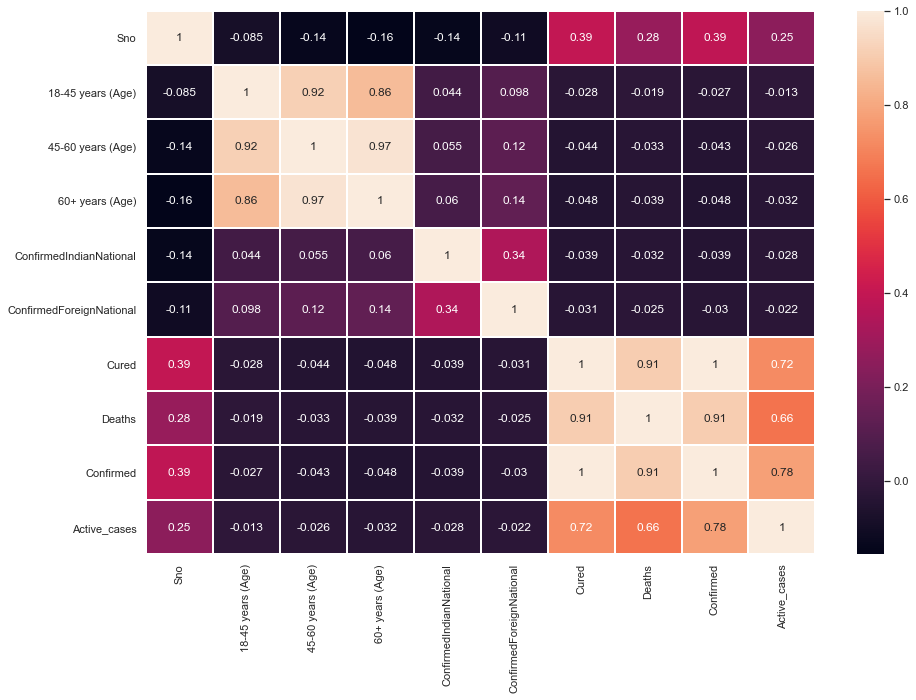

In [35]:
correlation = cd.corr()
correlation
plt.figure(figsize=(15,10))
sns.heatmap(correlation,linewidth=1,annot=True)

<AxesSubplot:>

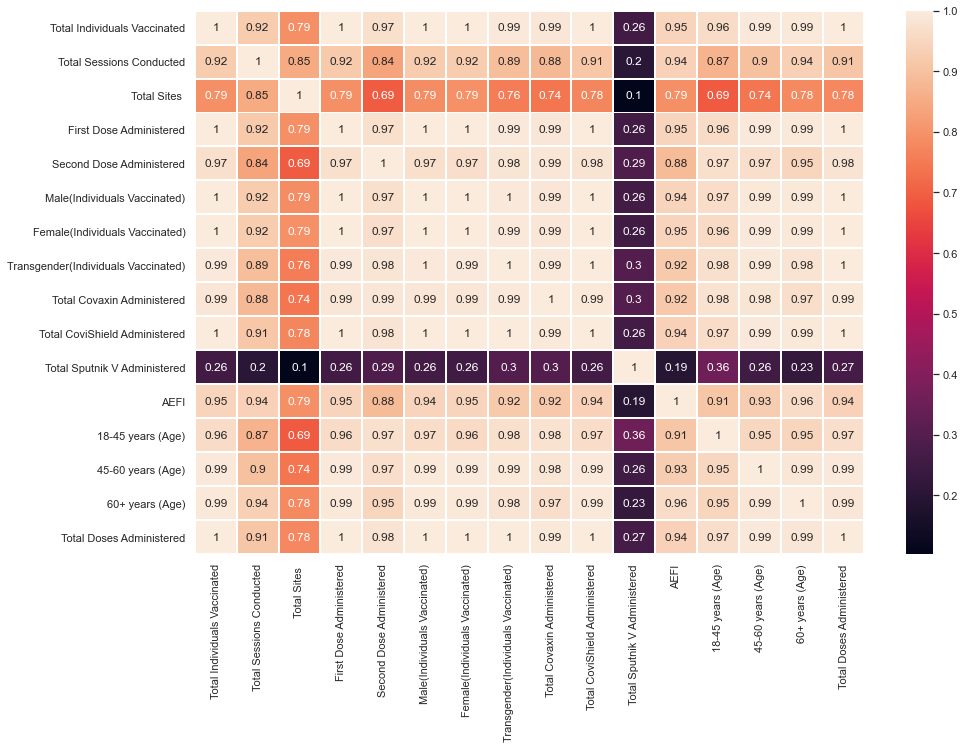

In [36]:
correlation = vd.corr()
correlation
plt.figure(figsize=(15,10))
sns.heatmap(correlation,linewidth=1,annot=True)

In [37]:
median_states=cd[cd['States'].isin(['Kerala','Tamil Nadu','Karnataka','Andhra Pradesh'])]
median_states.groupby(by=['States']).median().style.bar(['Active_cases'])

,Sno,18-45 years (Age),45-60 years (Age),60+ years (Age),ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases
States,,,,,,,,,,
Andhra Pradesh,7543.000000,154462.000000,164798.000000,29690.000000,0.000000,0.000000,749676.000000,6481.000000,789553.000000,6422.000000
Karnataka,7504.500000,156373.000000,179452.000000,41142.500000,0.000000,0.000000,649827.000000,10510.000000,768095.000000,17607.000000
Kerala,6823.000000,153230.000000,164798.000000,18521.000000,0.000000,0.000000,124688.000000,719.000000,187276.000000,27357.000000
Tamil Nadu,7483.500000,155982.000000,167568.000000,22059.000000,0.000000,0.000000,635172.500000,10614.000000,685443.000000,14658.000000


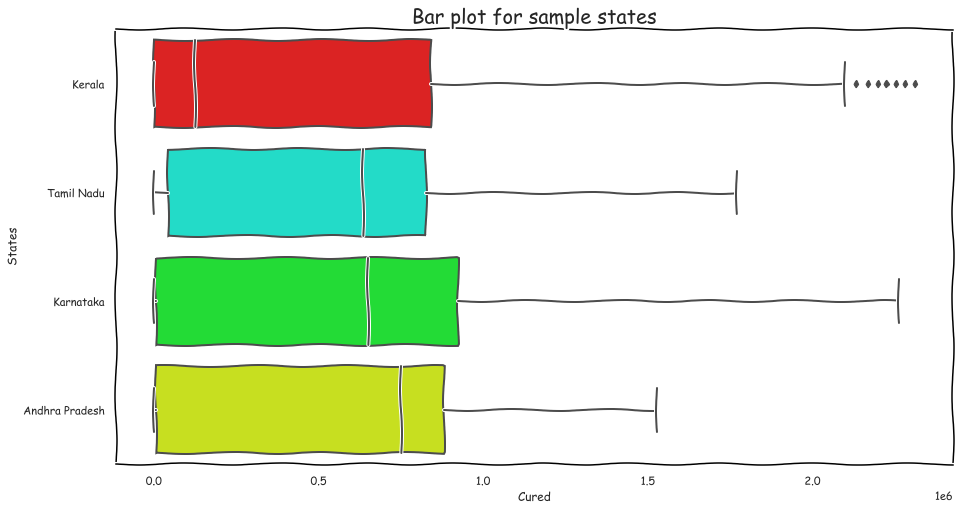

In [38]:
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    sns.boxplot(data=cd[cd['States'].isin(['Kerala','Tamil Nadu','Karnataka','Andhra Pradesh'])],x='Cured',y='States')
    plt.title("Bar plot for sample states" ,size=20)

In [39]:
median_states.groupby(by=['States']).median().style.bar(['Cured'])

,Sno,18-45 years (Age),45-60 years (Age),60+ years (Age),ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases
States,,,,,,,,,,
Andhra Pradesh,7543.000000,154462.000000,164798.000000,29690.000000,0.000000,0.000000,749676.000000,6481.000000,789553.000000,6422.000000
Karnataka,7504.500000,156373.000000,179452.000000,41142.500000,0.000000,0.000000,649827.000000,10510.000000,768095.000000,17607.000000
Kerala,6823.000000,153230.000000,164798.000000,18521.000000,0.000000,0.000000,124688.000000,719.000000,187276.000000,27357.000000
Tamil Nadu,7483.500000,155982.000000,167568.000000,22059.000000,0.000000,0.000000,635172.500000,10614.000000,685443.000000,14658.000000


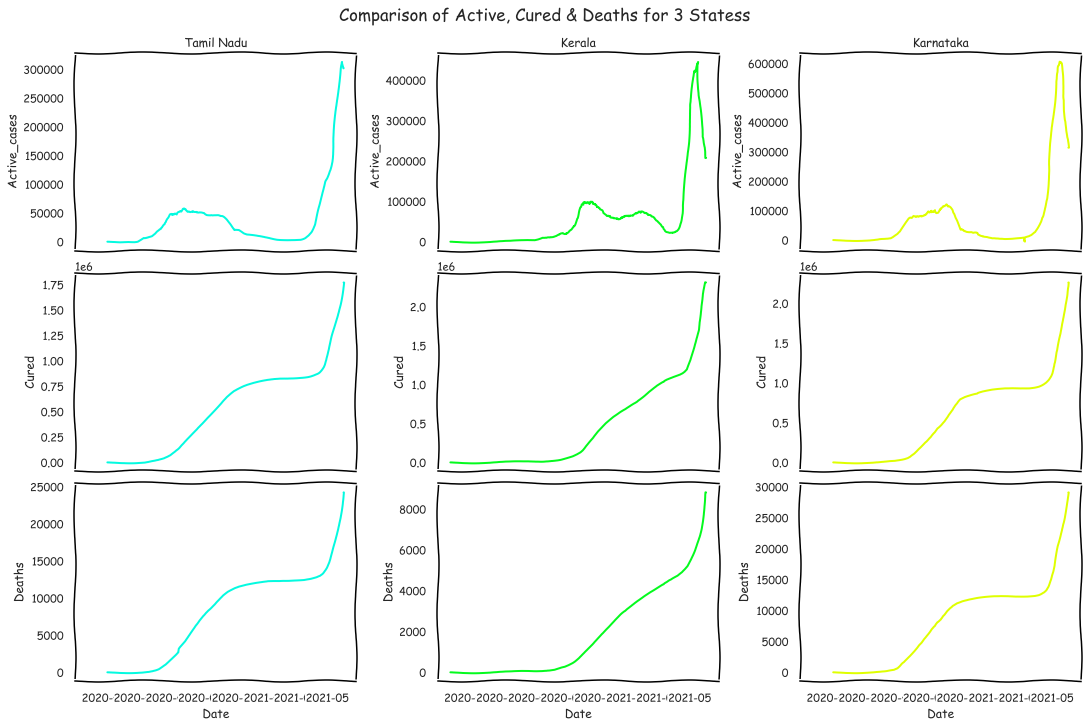

In [40]:
States=['Kerala', 'Tamil Nadu', 'Karnataka']
tn=cd[cd['States']=='Tamil Nadu']
kl=cd[cd['States']=='Kerala']
ka=cd[cd['States']=='Karnataka']

with plt.xkcd():

    fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(15,10), squeeze=False, sharex=True, sharey=False, constrained_layout=True )
    plt.suptitle("Comparison of Active, Cured & Deaths for 3 Statess")
    sns.lineplot(data=tn, x='Date',y='Active_cases', ax=ax[0,0], color=colors[1])
    ax[0,0].set_title("Tamil Nadu")
    sns.lineplot(data=tn, x='Date',y='Cured', ax=ax[1,0], color=colors[1])
    sns.lineplot(data=tn, x='Date',y='Deaths', ax=ax[2,0], color=colors[1])

    sns.lineplot(data=kl, x='Date',y='Active_cases', ax=ax[0,1], color=colors[2])
    ax[0,1].set_title("Kerala")
    sns.lineplot(data=kl, x='Date',y='Cured', ax=ax[1,1], color=colors[2])
    sns.lineplot(data=kl, x='Date',y='Deaths', ax=ax[2,1], color=colors[2])

    sns.lineplot(data=ka, x='Date',y='Active_cases', ax=ax[0,2], color=colors[3])
    ax[0,2].set_title("Karnataka")
    sns.lineplot(data=ka, x='Date',y='Cured', ax=ax[1,2], color=colors[3])
    sns.lineplot(data=ka, x='Date',y='Deaths', ax=ax[2,2], color=colors[3])

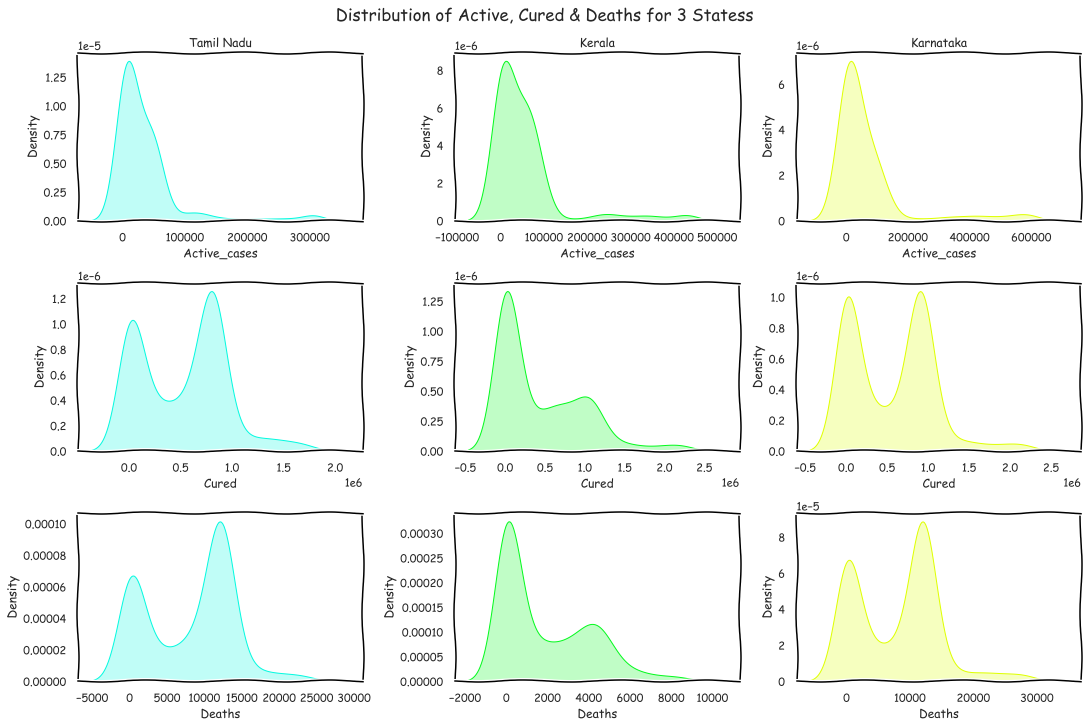

In [41]:
States=['Kerala', 'Tamil Nadu', 'Karnataka']
tn=cd[cd['States']=='Tamil Nadu']
kl=cd[cd['States']=='Kerala']
ka=cd[cd['States']=='Karnataka']

with plt.xkcd():

    fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(15,10), squeeze=False, sharex=False, sharey=False, constrained_layout=True )
    plt.suptitle("Distribution of Active, Cured & Deaths for 3 Statess")
    sns.kdeplot(data=tn['Active_cases'],ax=ax[0,0],color=colors[1], fill=True)
    ax[0,0].set_title("Tamil Nadu")
    sns.kdeplot(data=tn['Cured'],  ax=ax[1,0],color=colors[1],fill=True)
    sns.kdeplot(data=tn['Deaths'], ax=ax[2,0], color=colors[1],fill=True)

    sns.kdeplot(data=kl['Active_cases'], ax=ax[0,1], color=colors[2],fill=True)
    ax[0,1].set_title("Kerala")
    sns.kdeplot(data=kl['Cured'], ax=ax[1,1], color=colors[2],fill=True)
    sns.kdeplot(data=kl['Deaths'], ax=ax[2,1], color=colors[2],fill=True)

    sns.kdeplot(data=ka['Active_cases'], ax=ax[0,2], color=colors[3],fill=True)
    ax[0,2].set_title("Karnataka")
    sns.kdeplot(data=ka['Cured'], ax=ax[1,2], color=colors[3],fill=True)
    sns.kdeplot(data=ka['Deaths'], ax=ax[2,2], color=colors[3],fill=True)

### for testing purpose we shall take Sample states as Kerala, Tamil Nadu & Karnataka


In [42]:
tn=cd[cd['States']=='Tamil Nadu']['Cured']
ka=cd[cd['States']=='Karnataka']['Cured']
kl=cd[cd['States']=='Kerala']['Cured']

In [43]:
st,p_value=ttest_ind(tn,kl)
if p_value <0.05:
    print("Both Statess {} & {} have significant difference in Cure rate".format('Tamil Nadu','Kerala'))
else:
    print("Both Statess {} & {} have no significant difference in Cure rate".format('Tamil Nadu','Kerala'))

st,p_value=ttest_ind(tn,ka)
if p_value <0.05:
    print("Both Statess {} & {} have significant difference in Cure rate".format('Tamil Nadu','Karnataka'))
else:
    print("Both Statess {} & {} have no significant difference in Cure rate".format('Tamil Nadu','Karnataka'))

st,p_value=ttest_ind(kl,ka)
if p_value <0.05:
    print("Both Statess {} & {} have significant difference in Cure rate".format('Kerala','Karnataka'))
else:
    print("Both Statess {} & {} have no significant difference in Cure rate".format('Kerala','Karnataka'))

Both Statess Tamil Nadu & Kerala have significant difference in Cure rate
Both Statess Tamil Nadu & Karnataka have no significant difference in Cure rate
Both Statess Kerala & Karnataka have significant difference in Cure rate


### lets take mean impacted vs mean cured 
### propotion testing

In [44]:
tn_cured=cd[cd['States']=='Tamil Nadu']['Cured'].max()
ka_cured=cd[cd['States']=='Karnataka']['Cured'].max()
kl_cured=cd[cd['States']=='Kerala']['Cured'].max()

tn_active=cd[cd['States']=='Tamil Nadu']['Confirmed'].max()
ka_active=cd[cd['States']=='Karnataka']['Confirmed'].max()
kl_active=cd[cd['States']=='Kerala']['Confirmed'].max()

In [45]:
print([tn_cured, ka_cured] , [tn_active, ka_active])
print(f' Proportion of cured cases in Tamil Nadu, Karnataka = {round(tn_cured/tn_active,2)}%, {round(ka_cured/ka_active,2)}% respectively \n')

print([tn_cured, kl_cured] , [tn_active, kl_active])
print(f' Proportion of cured cases in Tamil Nadu, Kerala = {round(tn_cured/tn_active,2)}%, {round(kl_cured/kl_active,2)}% respectively \n')

print([ka_cured, kl_cured] , [ka_active, kl_active])
print(f' Proportion of cured cases in Tamil Nadu, Kerala = {round(ka_cured/ka_active,2)}%, {round(kl_cured/kl_active,2)}% respectively \n')

[1770503, 2261590] [2096516, 2604431]
 Proportion of cured cases in Tamil Nadu, Karnataka = 0.84%, 0.87% respectively 

[1770503, 2310385] [2096516, 2526579]
 Proportion of cured cases in Tamil Nadu, Kerala = 0.84%, 0.91% respectively 

[2261590, 2310385] [2604431, 2526579]
 Proportion of cured cases in Tamil Nadu, Kerala = 0.87%, 0.91% respectively 



In [46]:
stat, p_value = proportions_ztest([tn_cured, ka_cured] , [tn_active, ka_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Tamil Nadu','Karnataka'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Tamil Nadu','Karnataka'))

stat, p_value = proportions_ztest([tn_cured, kl_cured] , [tn_active, kl_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Tamil Nadu','Kerala'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Tamil Nadu','Kerala'))

stat, p_value = proportions_ztest([kl_cured, ka_cured] , [kl_active, ka_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Kerala','Karnataka'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Kerala','Karnataka'))


Both states Tamil Nadu & Karnataka have significant difference in Cure rate
Both states Tamil Nadu & Kerala have significant difference in Cure rate
Both states Kerala & Karnataka have significant difference in Cure rate


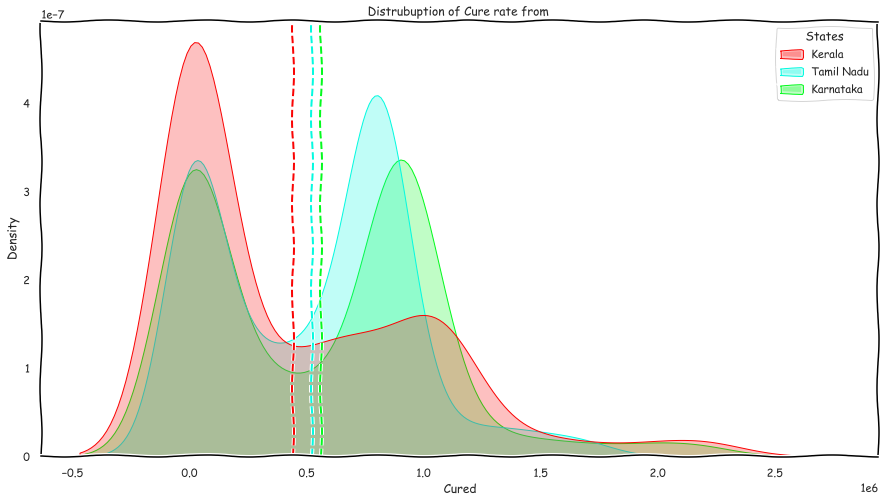

In [47]:
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    plt.title("Distrubuption of Cure rate from ")
    ax=sns.kdeplot(data=median_states[median_states['States'].isin(['Tamil Nadu','Karnataka','Kerala'])],x='Cured', hue='States', fill=True)
    ax.axvline(median_states[median_states['States']=='Kerala']['Cured'].mean(), ls='--', c=colors[0])
    ax.axvline(median_states[median_states['States']=='Tamil Nadu']['Cured'].mean(), ls='--', c=colors[1])
    ax.axvline(median_states[median_states['States']=='Karnataka']['Cured'].mean(), ls='--', c=colors[2])
    

### lets take mean impacted vs mean cured

In [48]:
tn_cured = cd[cd['States']=='Tamil Nadu']['Deaths'].max()
ka_cured=cd[cd['States']=='Karnataka']['Deaths'].max()
kl_cured=cd[cd['States']=='Kerala']['Deaths'].max()

tn_active = cd[cd['States']=='Tamil Nadu']['Confirmed'].max()
ka_active=cd[cd['States']=='Karnataka']['Confirmed'].max()
kl_active=cd[cd['States']=='Kerala']['Confirmed'].max()

print([tn_cured, ka_cured] , [tn_active, ka_active])
print(f' Proportion of Death cases in Tamil Nadu, Karnataka = {round(tn_cured/tn_active,2)}%, {round(ka_cured/ka_active,2)}% respectively \n')

print([tn_cured, kl_cured] , [tn_active, kl_active])
print(f' Proportion of Death cases in Tamil Nadu, Kerala = {round(tn_cured/tn_active,2)}%, {round(kl_cured/kl_active,2)}% respectively \n')

print([ka_cured, kl_cured] , [ka_active, kl_active])
print(f' Proportion of Death cases in Tamil Nadu, Kerala = {round(ka_cured/ka_active,2)}%, {round(kl_cured/kl_active,2)}% respectively \n')


stat, p_value = proportions_ztest([tn_cured, ka_cured] , [tn_active, ka_active])

if p_value <0.05:
    print("Both State {} & {} have significant difference in Death rate".format('Tamil Nadu','Karnataka'))
else:
    print("Both State {} & {} have no significant difference in Death rate".format('Tamil Nadu','Karnataka'))

stat, p_value = proportions_ztest([tn_cured, kl_cured] , [tn_active, kl_active])

if p_value <0.05:
    print("Both State {} & {} have significant difference in Death rate".format('Tamil Nadu','Kerala'))
else:
    print("Both State {} & {} have no significant difference in Death rate".format('Tamil Nadu','Kerala'))

stat, p_value = proportions_ztest([kl_cured, ka_cured] , [kl_active, ka_active])

if p_value <0.05:
    print("Both State {} & {} have significant difference in Death rate".format('Kerala','Karnataka'))
else:
    print("Both State {} & {} have no significant difference in Death rate".format('Kerala','Karnataka'))


[24232, 29090] [2096516, 2604431]
 Proportion of Death cases in Tamil Nadu, Karnataka = 0.01%, 0.01% respectively 

[24232, 8815] [2096516, 2526579]
 Proportion of Death cases in Tamil Nadu, Kerala = 0.01%, 0.0% respectively 

[29090, 8815] [2604431, 2526579]
 Proportion of Death cases in Tamil Nadu, Kerala = 0.01%, 0.0% respectively 

Both State Tamil Nadu & Karnataka have significant difference in Death rate
Both State Tamil Nadu & Kerala have significant difference in Death rate
Both State Kerala & Karnataka have significant difference in Death rate


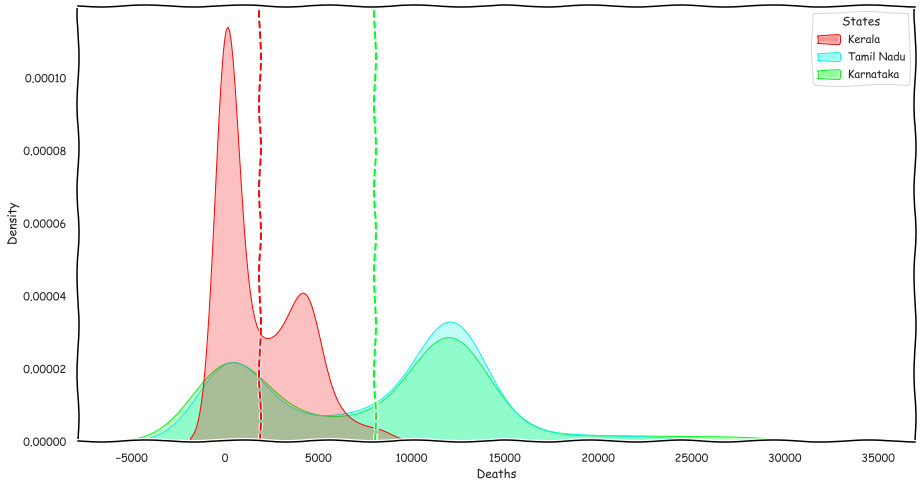

In [49]:
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    ax=sns.kdeplot(data=median_states[median_states['States'].isin(['Tamil Nadu','Karnataka','Kerala'])],x='Deaths', hue='States', fill=True)
    ax.axvline(median_states[median_states['States']=='Kerala']['Deaths'].mean(), ls='--', c=colors[0])
    ax.axvline(median_states[median_states['States']=='Tamil Nadu']['Deaths'].mean(), ls='--', c=colors[1])
    ax.axvline(median_states[median_states['States']=='Karnataka']['Deaths'].mean(), ls='--', c=colors[2])

In [50]:
sd = pd.read_csv('D:/college/PG/3RD SEM/MINI PROJECT/Latest_Covid-19_India_Status.csv')

Text(0.5, 1.0, 'Death Ratio in Different States')

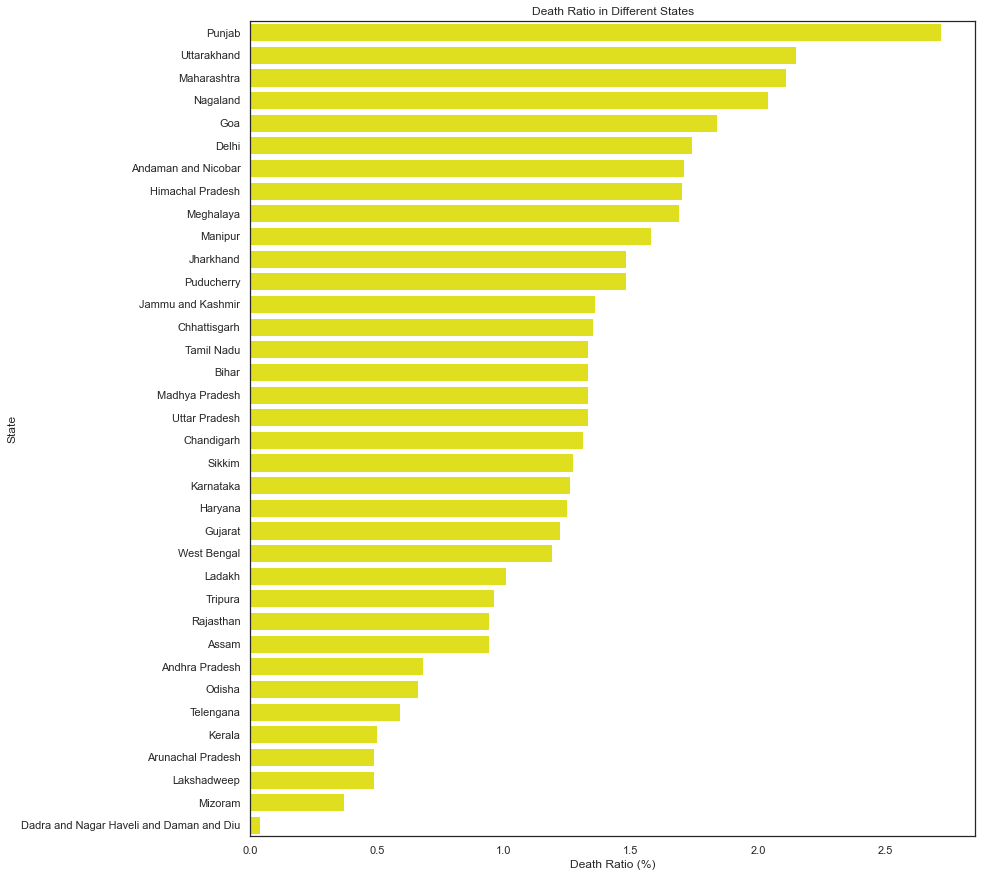

In [51]:
sd = sd.sort_values(by='Death Ratio (%)',ascending=False)
plt.figure(figsize=(13,15))
sns.barplot(y = 'State/UTs',x = 'Death Ratio (%)',data=sd,color='yellow')
plt.ylabel('State')
plt.xlabel('Death Ratio (%)')
plt.title('Death Ratio in Different States')

In [52]:
x=cd.drop('Sno',axis=1)
y=cd['Sno']

In [53]:
cdd=pd.get_dummies(x)

In [54]:
cdd.head()

,Date,18-45 years (Age),45-60 years (Age),60+ years (Age),ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases,...,States_Rajasthan,States_Sikkim,States_Tamil Nadu,States_Telangana,States_Telengana,States_Tripura,States_Unassigned,States_Uttar Pradesh,States_Uttarakhand,States_West Bengal
0,2020-01-30,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-31,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2020-02-01,0,0,0,2,0,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
3,2020-02-02,0,0,0,3,0,0,0,3,3,...,0,0,0,0,0,0,0,0,0,0
4,2020-02-03,0,0,0,3,0,0,0,3,3,...,0,0,0,0,0,0,0,0,0,0


In [55]:
cd.describe().T

,count,mean,std,min,25%,50%,75%,max
Sno,15554.0,7777.500000,4.490197e+03,1.0,3889.25,7777.5,11665.75,15554.0
18-45 years (Age),15554.0,424175.019995,1.312064e+06,0.0,5745.50,155982.0,289095.75,36494965.0
45-60 years (Age),15554.0,756396.684133,3.592004e+06,0.0,226.00,167961.0,607733.00,72388059.0
60+ years (Age),15554.0,534375.626527,3.307797e+06,0.0,0.00,35003.5,288615.25,59461062.0
ConfirmedIndianNational,15554.0,0.349492,4.179123e+00,0.0,0.00,0.0,0.00,177.0
ConfirmedForeignNational,15554.0,0.042883,6.543995e-01,0.0,0.00,0.0,0.00,14.0
Cured,15554.0,189818.374502,4.061648e+05,0.0,1950.25,21415.5,215148.25,5395370.0
Deaths,15554.0,2898.898804,7.637202e+03,0.0,14.00,374.0,2527.00,95344.0
Confirmed,15554.0,211083.525010,4.542665e+05,0.0,3177.00,28749.0,238783.00,5746892.0
Active_cases,15554.0,18366.251704,5.472997e+04,-9368.0,264.25,2077.5,12388.25,701614.0


In [56]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15554 entries, 0 to 15553
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       15554 non-null  int64         
 1   Date                      15554 non-null  datetime64[ns]
 2   States                    15554 non-null  object        
 3   18-45 years (Age)         15554 non-null  int64         
 4   45-60 years (Age)         15554 non-null  int64         
 5   60+ years (Age)           15554 non-null  int64         
 6   ConfirmedIndianNational   15554 non-null  int64         
 7   ConfirmedForeignNational  15554 non-null  int64         
 8   Cured                     15554 non-null  int64         
 9   Deaths                    15554 non-null  int64         
 10  Confirmed                 15554 non-null  int64         
 11  Active_cases              15554 non-null  int64         
dtypes: datetime64[ns](

In [57]:
cd.duplicated().T

0        False
1        False
2        False
3        False
4        False
         ...  
15549    False
15550    False
15551    False
15552    False
15553    False
Length: 15554, dtype: bool

In [58]:
a=cd[["Date","18-45 years (Age)","45-60 years (Age)","60+ years (Age)","ConfirmedIndianNational","ConfirmedForeignNational","Cured","Deaths","Confirmed"]]

In [59]:
a

,Date,18-45 years (Age),45-60 years (Age),60+ years (Age),ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-01-30,0,0,0,1,0,0,0,1
1,2020-01-31,0,0,0,1,0,0,0,1
2,2020-02-01,0,0,0,2,0,0,0,2
3,2020-02-02,0,0,0,3,0,0,0,3
4,2020-02-03,0,0,0,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
15549,2021-06-01,166058,502704,426706,0,0,540986,3281,578351
15550,2021-06-01,166216,524640,437731,0,0,44908,519,51974
15551,2021-06-01,166743,564286,459298,0,0,294671,6452,329494
15552,2021-06-01,166998,581627,468906,0,0,1633947,20497,1691488


In [60]:
k=a[["Date","18-45 years (Age)","45-60 years (Age)","60+ years (Age)","ConfirmedIndianNational","ConfirmedForeignNational","Cured","Deaths","Confirmed"]]

In [61]:
k

,Date,18-45 years (Age),45-60 years (Age),60+ years (Age),ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-01-30,0,0,0,1,0,0,0,1
1,2020-01-31,0,0,0,1,0,0,0,1
2,2020-02-01,0,0,0,2,0,0,0,2
3,2020-02-02,0,0,0,3,0,0,0,3
4,2020-02-03,0,0,0,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
15549,2021-06-01,166058,502704,426706,0,0,540986,3281,578351
15550,2021-06-01,166216,524640,437731,0,0,44908,519,51974
15551,2021-06-01,166743,564286,459298,0,0,294671,6452,329494
15552,2021-06-01,166998,581627,468906,0,0,1633947,20497,1691488


### CREATING MODELS (TRAINING AND TESTING)

In [62]:
b=k[["Date"]]
b

,Date
0,2020-01-30
1,2020-01-31
2,2020-02-01
3,2020-02-02
4,2020-02-03
...,...
15549,2021-06-01
15550,2021-06-01
15551,2021-06-01
15552,2021-06-01


In [63]:
c=k[["18-45 years (Age)"]]
c

,18-45 years (Age)
0,0
1,0
2,0
3,0
4,0
...,...
15549,166058
15550,166216
15551,166743
15552,166998


In [64]:
d=k[["45-60 years (Age)"]]
d

,45-60 years (Age)
0,0
1,0
2,0
3,0
4,0
...,...
15549,502704
15550,524640
15551,564286
15552,581627


In [65]:
l=k[["60+ years (Age)"]]
l

,60+ years (Age)
0,0
1,0
2,0
3,0
4,0
...,...
15549,426706
15550,437731
15551,459298
15552,468906


In [66]:
f=k[["ConfirmedIndianNational"]]
f

,ConfirmedIndianNational
0,1
1,1
2,2
3,3
4,3
...,...
15549,0
15550,0
15551,0
15552,0


In [67]:
g=k[["ConfirmedForeignNational"]]
g

,ConfirmedForeignNational
0,0
1,0
2,0
3,0
4,0
...,...
15549,0
15550,0
15551,0
15552,0


In [68]:
h=k[["Cured"]]
h

,Cured
0,0
1,0
2,0
3,0
4,0
...,...
15549,540986
15550,44908
15551,294671
15552,1633947


In [69]:
i=k[["Deaths"]]
i

,Deaths
0,0
1,0
2,0
3,0
4,0
...,...
15549,3281
15550,519
15551,6452
15552,20497


In [70]:
j=k[["Confirmed"]]
j

,Confirmed
0,1
1,1
2,2
3,3
4,3
...,...
15549,578351
15550,51974
15551,329494
15552,1691488


In [71]:
b_train,b_test,c_train,c_test,d_train,d_test,f_train,f_test,g_train,g_test,h_train,h_test,i_train,i_test,j_train,j_test=train_test_split(b,c,d,f,g,h,i,j,test_size=0.3,random_state=42)

In [72]:
sc=StandardScaler()
sc.fit(b_train)
b_train_std=sc.transform(b_train)
b_test_std=sc.transform(b_test)
pca=PCA()
b_train_pca=pca.fit_transform(b_train_std)
b_test_pca=pca.fit_transform(b_test_std)

In [73]:
sc=StandardScaler()
sc.fit(c_train)
c_train_std=sc.transform(c_train)
c_test_std=sc.transform(c_test)
pca=PCA()
c_train_pca=pca.fit_transform(c_train_std)
c_test_pca=pca.fit_transform(c_test_std)

In [74]:
sc=StandardScaler()
sc.fit(d_train)
d_train_std=sc.transform(d_train)
d_test_std=sc.transform(d_test)
pca=PCA()
d_train_pca=pca.fit_transform(d_train_std)
d_test_pca=pca.fit_transform(d_test_std)

In [75]:
sc=StandardScaler()
sc.fit(f_train)
f_train_std=sc.transform(f_train)
f_test_std=sc.transform(f_test)
pca=PCA()
f_train_pca=pca.fit_transform(f_train_std)
f_test_pca=pca.fit_transform(f_test_std)

In [76]:
sc=StandardScaler()
sc.fit(g_train)
g_train_std=sc.transform(g_train)
g_test_std=sc.transform(g_test)
pca=PCA()
g_train_pca=pca.fit_transform(g_train_std)
g_test_pca=pca.fit_transform(g_test_std)

In [77]:
sc=StandardScaler()
sc.fit(h_train)
h_train_std=sc.transform(h_train)
h_test_std=sc.transform(h_test)
pca=PCA()
h_train_pca=pca.fit_transform(h_train_std)
h_test_pca=pca.fit_transform(h_test_std)

In [78]:
sc=StandardScaler()
sc.fit(i_train)
i_train_std=sc.transform(i_train)
i_test_std=sc.transform(i_test)
pca=PCA()
i_train_pca=pca.fit_transform(i_train_std)
i_test_pca=pca.fit_transform(i_test_std)

In [79]:
sc=StandardScaler()
sc.fit(j_train)
j_train_std=sc.transform(j_train)
j_test_std=sc.transform(j_test)
pca=PCA()
j_train_pca=pca.fit_transform(j_train_std)
j_test_pca=pca.fit_transform(j_test_std)

In [80]:
print(b_train_std,b_test_std,b_train_pca,b_test_pca)

[[ 1.24037817]
 [-1.42175919]
 [-0.20813775]
 ...
 [-0.52916019]
 [-1.55486606]
 [-0.10635014]] [[-1.79759034]
 [ 1.09944148]
 [-0.2864359 ]
 ...
 [-1.39043993]
 [-0.41171296]
 [ 1.60837951]] [[-1.24037817]
 [ 1.42175919]
 [ 0.20813775]
 ...
 [ 0.52916019]
 [ 1.55486606]
 [ 0.10635014]] [[ 1.78422828]
 [-1.11280355]
 [ 0.27307384]
 ...
 [ 1.37707786]
 [ 0.39835089]
 [-1.62174157]]


In [81]:
print(c_train_std,c_test_std,c_train_pca,c_test_pca)

[[-0.20990722]
 [-0.32706918]
 [ 0.75977516]
 ...
 [-0.32706918]
 [-0.32706918]
 [-0.19375956]] [[ 8.65292392]
 [-0.3245326 ]
 [-0.1977782 ]
 ...
 [-0.24901286]
 [-0.24770166]
 [-0.3245183 ]] [[-0.20990722]
 [-0.32706918]
 [ 0.75977516]
 ...
 [-0.32706918]
 [-0.32706918]
 [-0.19375956]] [[ 8.61956507]
 [-0.35789144]
 [-0.23113704]
 ...
 [-0.28237171]
 [-0.2810605 ]
 [-0.35787714]]


In [82]:
print(d_train_std,d_test_std,d_train_pca,d_test_pca)

[[-0.16442195]
 [-0.21409516]
 [ 0.22824746]
 ...
 [-0.21409516]
 [-0.21409516]
 [-0.10691067]] [[16.81228232]
 [-0.21409457]
 [-0.17291633]
 ...
 [-0.1606    ]
 [-0.19360372]
 [-0.21409457]] [[-0.16442195]
 [-0.21409516]
 [ 0.22824746]
 ...
 [-0.21409516]
 [-0.21409516]
 [-0.10691067]] [[16.77852755]
 [-0.24784933]
 [-0.20667109]
 ...
 [-0.19435476]
 [-0.22735848]
 [-0.24784933]]


In [83]:
print(f_train_std,f_test_std,f_train_pca,f_test_pca)

[[-0.08896085]
 [-0.08896085]
 [-0.08896085]
 ...
 [-0.08896085]
 [-0.08896085]
 [-0.08896085]] [[-0.08896085]
 [-0.08896085]
 [-0.08896085]
 ...
 [-0.08896085]
 [-0.08896085]
 [-0.08896085]] [[-0.08896085]
 [-0.08896085]
 [-0.08896085]
 ...
 [-0.08896085]
 [-0.08896085]
 [-0.08896085]] [[-0.11776476]
 [-0.11776476]
 [-0.11776476]
 ...
 [-0.11776476]
 [-0.11776476]
 [-0.11776476]]


In [84]:
print(g_train_std,g_test_std,h_train_pca,h_test_pca)

[[-0.06056155]
 [-0.06056155]
 [-0.06056155]
 ...
 [-0.06056155]
 [-0.06056155]
 [-0.06056155]] [[22.90130359]
 [-0.06056155]
 [-0.06056155]
 ...
 [-0.06056155]
 [-0.06056155]
 [-0.06056155]] [[-0.37032157]
 [-0.46731071]
 [ 0.12636546]
 ...
 [ 0.62245738]
 [-0.46747169]
 [-0.38529457]] [[-0.45242813]
 [ 4.77859287]
 [-0.43592588]
 ...
 [-0.45237935]
 [-0.44554284]
 [-0.28019838]]


In [85]:
print(h_train_std,h_test_std,h_train_pca,h_test_pca)

[[-0.37032157]
 [-0.46731071]
 [ 0.12636546]
 ...
 [ 0.62245738]
 [-0.46747169]
 [-0.38529457]] [[-0.46748388]
 [ 4.76353712]
 [-0.45098163]
 ...
 [-0.4674351 ]
 [-0.46059859]
 [-0.29525413]] [[-0.37032157]
 [-0.46731071]
 [ 0.12636546]
 ...
 [ 0.62245738]
 [-0.46747169]
 [-0.38529457]] [[-0.45242813]
 [ 4.77859287]
 [-0.43592588]
 ...
 [-0.45237935]
 [-0.44554284]
 [-0.28019838]]


In [86]:
print(i_train_std,i_test_std,i_train_pca,i_test_pca)

[[-0.291907  ]
 [-0.37693479]
 [ 0.2999681 ]
 ...
 [ 2.30603657]
 [-0.37923283]
 [-0.3139938 ]] [[-0.37923283]
 [ 6.37562473]
 [-0.36404018]
 ...
 [-0.37884983]
 [-0.37310471]
 [-0.22079517]] [[-0.291907  ]
 [-0.37693479]
 [ 0.2999681 ]
 ...
 [ 2.30603657]
 [-0.37923283]
 [-0.3139938 ]] [[-0.34879701]
 [ 6.40606056]
 [-0.33360436]
 ...
 [-0.348414  ]
 [-0.34266888]
 [-0.19035935]]


In [87]:
print(j_train_std,j_test_std,j_train_pca,j_test_pca)

[[-0.37334289]
 [-0.46414553]
 [ 0.13791607]
 ...
 [ 0.90642083]
 [-0.46475193]
 [-0.38046915]] [[-0.46479774]
 [ 4.61640305]
 [-0.44346038]
 ...
 [-0.46458615]
 [-0.45779799]
 [-0.26958557]] [[-0.37334289]
 [-0.46414553]
 [ 0.13791607]
 ...
 [ 0.90642083]
 [-0.46475193]
 [-0.38046915]] [[-0.45015236]
 [ 4.63104843]
 [-0.42881501]
 ...
 [-0.44994078]
 [-0.44315261]
 [-0.2549402 ]]


In [88]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit( b_train, c_train) 
pred_train_rf= model_rf.predict(b_train)

In [89]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print(np.sqrt(mean_squared_error(c_train,pred_train_rf)))
print(r2_score(c_train, pred_train_rf))

352655.32505511
0.9214632452883227


In [90]:
pred_test_rf = model_rf.predict(b_test)
print(np.sqrt(mean_squared_error(c_test,pred_test_rf)))
print(r2_score(c_test, pred_test_rf))

377613.90629000997
0.93016268022901


In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(b_train, b_train)
print(knn.predict(b_test))

['2020-03-11T00:00:00.000000000' '2021-03-16T00:00:00.000000000'
 '2020-09-20T00:00:00.000000000' ... '2020-05-02T00:00:00.000000000'
 '2020-09-04T00:00:00.000000000' '2021-05-20T00:00:00.000000000']


In [92]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(b_train, c_train)
print(knn.score(b_test, c_test))

0.22198414398971503


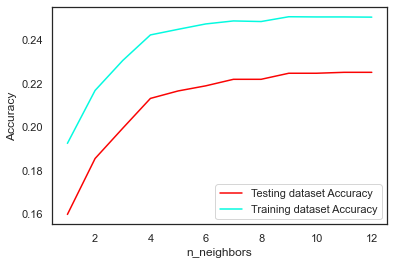

In [93]:
neighbors = np.arange(1, 13)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(b_train, c_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(b_train, c_train)
    test_accuracy[i] = knn.score(b_test, c_test)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(d_train, d_train)
print(knn.predict(d_test))

[55220908        2   137176 ...   179452    68863        2]


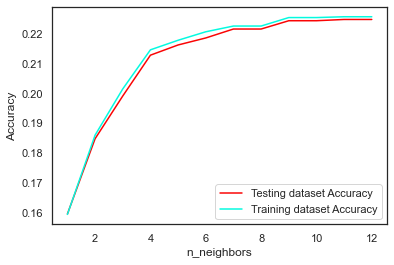

In [95]:
neighbors = np.arange(1, 13)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(b_train, c_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(b_train, d_train)
    test_accuracy[i] = knn.score(b_test, d_test)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [96]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit( b_train, d_train) 
pred_train_rf= model_rf.predict(b_train)
from sklearn.metrics import mean_squared_error
from math import sqrt
print(np.sqrt(mean_squared_error(d_train,pred_train_rf)))
print(r2_score(d_train, pred_train_rf))

521710.57272905775
0.9760821782123595


In [97]:
pred_test_rf = model_rf.predict(b_test)
print(np.sqrt(mean_squared_error(d_test,pred_test_rf)))
print(r2_score(d_test, pred_test_rf))

576364.3303367015
0.9797965589345161


In [98]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(b_train, d_train)
print(knn.score(b_test, d_test))

0.22176987358045855


In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(f_train, f_train)
print(knn.predict(f_test))

[0 0 0 ... 0 0 0]


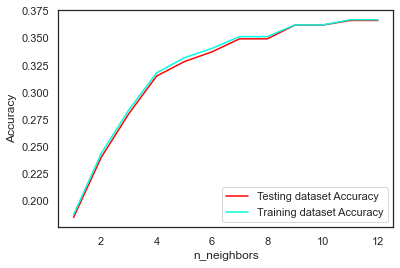

In [100]:
neighbors = np.arange(1, 13)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(b_train, c_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(b_train, f_train)
    test_accuracy[i] = knn.score(b_test, f_test)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [101]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit( b_train, g_train) 
pred_train_rf= model_rf.predict(b_train)
from sklearn.metrics import mean_squared_error
from math import sqrt
print(np.sqrt(mean_squared_error(g_train,pred_train_rf)))
print(r2_score(g_train, pred_train_rf))

0.5482527098823688
0.19142589986245184


In [102]:
pred_test_rf = model_rf.predict(b_test)
print(np.sqrt(mean_squared_error(g_test,pred_test_rf)))
print(r2_score(g_test, pred_test_rf))

0.737951230286751
0.026966509332553623


In [103]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(b_train, g_train)
print(knn.score(b_test, g_test))

0.9890722091279195


In [104]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(f_train, f_train)
print(knn.predict(f_test))

[0 0 0 ... 0 0 0]


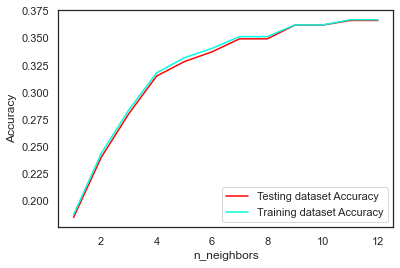

In [105]:
neighbors = np.arange(1, 13)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(b_train, c_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(b_train, f_train)
    test_accuracy[i] = knn.score(b_test, f_test)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [106]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit( b_train, f_train) 
pred_train_rf= model_rf.predict(b_train)
from sklearn.metrics import mean_squared_error
from math import sqrt
print(np.sqrt(mean_squared_error(f_train,pred_train_rf)))
print(r2_score(f_train, pred_train_rf))

2.7136495489747188
0.42566714787259274


In [107]:
pred_test_rf = model_rf.predict(b_test)
print(np.sqrt(mean_squared_error(f_test,pred_test_rf)))
print(r2_score(f_test, pred_test_rf))

4.52703598538519
0.2754665340660688


In [108]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(b_train, f_train)
print(knn.score(b_test, f_test))

0.9768587958003


### MODEL FOR TAMIL NADU

In [109]:
tn_count=cd[cd['States']=='Tamil Nadu']
daily=[]
daily.append(0)
for i in range(1, len(tn_count)):
    daily.append(tn_count['Confirmed'].iloc[i]-tn_count['Confirmed'].iloc[i-1])
tn_count['Daily']=daily

In [110]:
ds=pd.DataFrame(columns=['ds','y'])

ds['ds']=tn_count['Date']
ds['y']=tn_count['Daily']
model = Prophet(changepoint_range=1)
model.fit(ds)
future = model.make_future_dataframe(periods=20)
f=model.predict(future)
f['ds']=pd.to_datetime(f['ds'], format='%Y-%m-%d')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


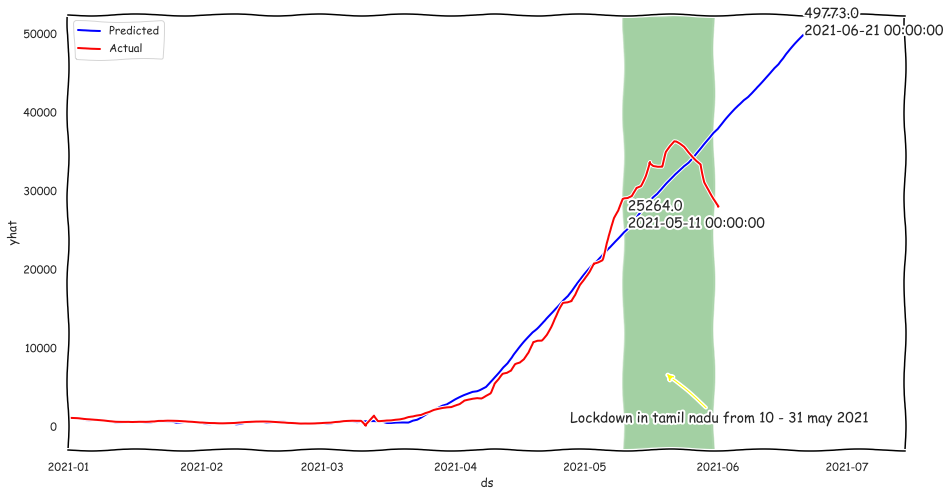

In [111]:
today=f[f['ds']=='2021-05-11 00:00:00']
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
            
    ax=sns.lineplot(data=f, x='ds',y='yhat', alpha=1, color='blue')
    ax=sns.lineplot(data=tn_count, x='Date',y='Daily')
    ax.set_xlim(mtd.datestr2num('2021-01-01'))
    
    ax.annotate(text=str(np.round(f['yhat'].iloc[-1],0))+ "\n"+ str(f['ds'].iloc[-1]), xy=(f['ds'].iloc[-1],f['yhat'].iloc[-1]))
    ax.annotate(text=str(np.round(today['yhat'].iloc[-1],0))+ "\n"+ str(today['ds'].iloc[-1]), xy=(today['ds'].iloc[-1],today['yhat'].iloc[-1]))
    
    ax.annotate(text="Lockdown in tamil nadu from 10 - 31 may 2021", xy=(0.70,0.25), xycoords='figure fraction', xytext=(0.60, 0.15),arrowprops={'arrowstyle':'-|>','color':'yellow'})
    ax.axvspan(xmin='2021-05-10 00:00:00', xmax='2021-05-31 00:00:00', alpha=0.2, facecolor='g')
    
    ax.legend(labels=['Predicted','Actual'], loc='upper left')
    

### MODEL FOR KERALA

In [112]:
kl_count=cd[cd['States']=='Kerala']
daily=[]
daily.append(0)
for i in range(1, len(kl_count)):
    daily.append(kl_count['Confirmed'].iloc[i]-kl_count['Confirmed'].iloc[i-1])
kl_count['Daily']=daily

In [113]:
ds=pd.DataFrame(columns=['ds','y'])

ds['ds']=kl_count['Date']
ds['y']=kl_count['Daily']
model = Prophet(changepoint_range=1)
model.fit(ds)
future = model.make_future_dataframe(periods=20)
f=model.predict(future)
f['ds']=pd.to_datetime(f['ds'], format='%Y-%m-%d')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


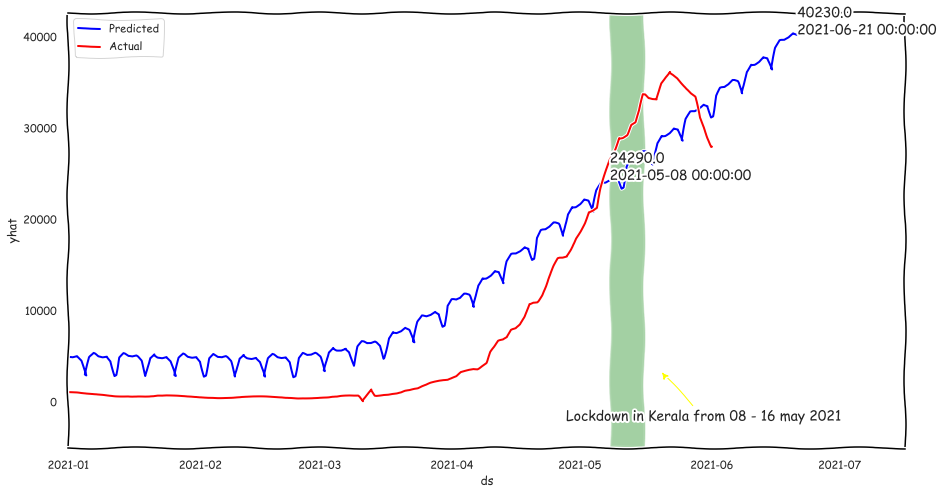

In [114]:
today=f[f['ds']=='2021-05-08 00:00:00']
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
            
    ax=sns.lineplot(data=f, x='ds',y='yhat', alpha=1, color='blue')
    ax=sns.lineplot(data=tn_count, x='Date',y='Daily')
    ax.set_xlim(mtd.datestr2num('2021-01-01'))
    
    ax.annotate(text=str(np.round(f['yhat'].iloc[-1],0))+ "\n"+ str(f['ds'].iloc[-1]), xy=(f['ds'].iloc[-1],f['yhat'].iloc[-1]))
    ax.annotate(text=str(np.round(today['yhat'].iloc[-1],0))+ "\n"+ str(today['ds'].iloc[-1]), xy=(today['ds'].iloc[-1],today['yhat'].iloc[-1]))
    
    ax.annotate(text="Lockdown in Kerala from 08 - 16 may 2021", xy=(0.70,0.25), xycoords='figure fraction', xytext=(0.60, 0.15),arrowprops={'arrowstyle':'-|>','color':'yellow'})
    ax.axvspan(xmin='2021-05-08 00:00:00', xmax='2021-05-16 00:00:00', alpha=0.2, facecolor='g')
    
    ax.legend(labels=['Predicted','Actual'], loc='upper left')
    

### MODEL FOR KARNATAKA

In [115]:
ka_count=cd[cd['States']=='Karnataka']
daily=[]
daily.append(0)
for i in range(1, len(ka_count)):
    daily.append(ka_count['Confirmed'].iloc[i]-ka_count['Confirmed'].iloc[i-1])
ka_count['Daily']=daily    

In [116]:
ds=pd.DataFrame(columns=['ds','y'])

ds['ds']=ka_count['Date']
ds['y']=ka_count['Daily']
model = Prophet(changepoint_range=1)
model.fit(ds)
future = model.make_future_dataframe(periods=20)
f=model.predict(future)
f['ds']=pd.to_datetime(f['ds'], format='%Y-%m-%d')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


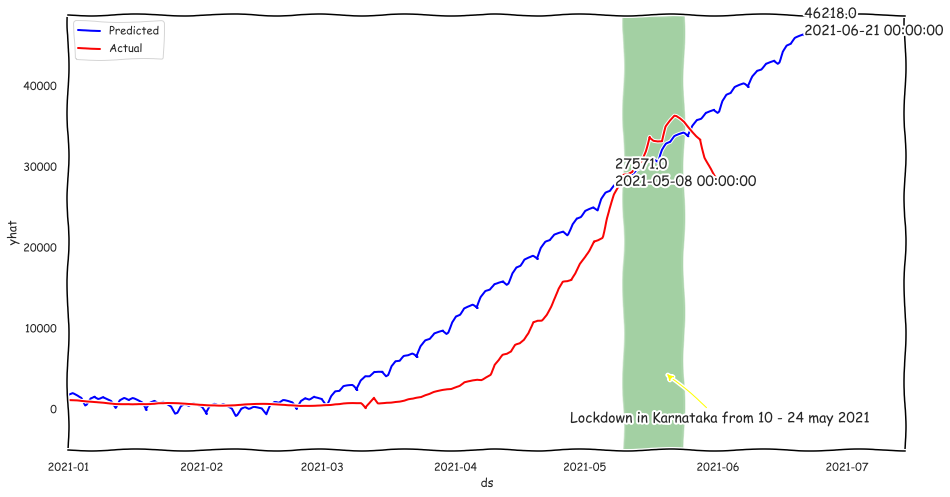

In [117]:
today=f[f['ds']=='2021-05-08 00:00:00']
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
            
    ax=sns.lineplot(data=f, x='ds',y='yhat', alpha=1, color='blue')
    ax=sns.lineplot(data=tn_count, x='Date',y='Daily')
    ax.set_xlim(mtd.datestr2num('2021-01-01'))
    
    ax.annotate(text=str(np.round(f['yhat'].iloc[-1],0))+ "\n"+ str(f['ds'].iloc[-1]), xy=(f['ds'].iloc[-1],f['yhat'].iloc[-1]))
    ax.annotate(text=str(np.round(today['yhat'].iloc[-1],0))+ "\n"+ str(today['ds'].iloc[-1]), xy=(today['ds'].iloc[-1],today['yhat'].iloc[-1]))
    
    ax.annotate(text="Lockdown in Karnataka from 10 - 24 may 2021", xy=(0.70,0.25), xycoords='figure fraction', xytext=(0.60, 0.15),arrowprops={'arrowstyle':'-|>','color':'yellow'})
    ax.axvspan(xmin='2021-05-10 00:00:00', xmax='2021-05-24 00:00:00', alpha=0.2, facecolor='g')
    
    ax.legend(labels=['Predicted','Actual'], loc='upper left')